In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
heart = pd.read_csv("C:/Users/Delmafia91/Downloads/heart.csv")

In [3]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# I am going to change the names for clarity
"""heart.columns = ['age', 'sex', 'chestpain', 'bp', 'chol', 'bs',
                'rest_ecg', 'max_hr', 'exerinduced_angina',
                 'depres', 'slope', 'majorvess', 'thalassemia',
                 'target']

# I am also going to change the values of the categorical variable
heart['sex'][heart['sex'] == 0] = 'female'
heart['sex'][heart['sex'] == 1] = 'male'
heart['chestpain'][heart['chestpain'] == 1] = 'typical angina'
heart['chestpain'][heart['chestpain'] == 2] = 'atypical angina'
heart['chestpain'][heart['chestpain'] == 3] = 'non-atypical angina'
heart['chestpain'][heart['chestpain'] == 4] = 'asymptomatic'

heart['bp'][heart['bp'] == 0] = '<= 120mg/ml'
heart['bp'][heart['bp'] == 1] = '> 120mg/ml'

heart['rest_ecg'][heart['rest_ecg'] == 0] = 'normal'
heart['rest_ecg'][heart['rest_ecg'] == 1] = 'ST-T wave abnormal'
heart['rest_ecg'][heart['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart['exerinduced_angina'][heart['exerinduced_angina'] == 0] = 'no'
heart['exerinduced_angina'][heart['exerinduced_angina'] == 1] = 'yes'

heart['slope'][heart['slope'] ==1] = 'unsloping'
heart['slope'][heart['slope'] ==2] = 'flat'
heart['slope'][heart['slope'] ==3] = 'downsloping'

heart['thalassemia'][heart['thalassemia'] ==1] = 'normal'
heart['thalassemia'][heart['thalassemia'] ==2] = 'fixed defect'
heart['thalassemia'][heart['thalassemia'] ==3] = 'reversable defect'"""

"heart.columns = ['age', 'sex', 'chestpain', 'bp', 'chol', 'bs',\n                'rest_ecg', 'max_hr', 'exerinduced_angina',\n                 'depres', 'slope', 'majorvess', 'thalassemia',\n                 'target']\n\n# I am also going to change the values of the categorical variable\nheart['sex'][heart['sex'] == 0] = 'female'\nheart['sex'][heart['sex'] == 1] = 'male'\nheart['chestpain'][heart['chestpain'] == 1] = 'typical angina'\nheart['chestpain'][heart['chestpain'] == 2] = 'atypical angina'\nheart['chestpain'][heart['chestpain'] == 3] = 'non-atypical angina'\nheart['chestpain'][heart['chestpain'] == 4] = 'asymptomatic'\n\nheart['bp'][heart['bp'] == 0] = '<= 120mg/ml'\nheart['bp'][heart['bp'] == 1] = '> 120mg/ml'\n\nheart['rest_ecg'][heart['rest_ecg'] == 0] = 'normal'\nheart['rest_ecg'][heart['rest_ecg'] == 1] = 'ST-T wave abnormal'\nheart['rest_ecg'][heart['rest_ecg'] == 2] = 'left ventricular hypertrophy'\n\nheart['exerinduced_angina'][heart['exerinduced_angina'] == 0] = 'no'\

In [19]:
heart.shape

(303, 14)

In [20]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [21]:
"""heart['sex'] = heart['sex'].astype('object')
heart['chestpain'] = heart['chestpain'].astype('object')
heart['bs'] = heart['bs'].astype('object')
heart['rest_ecg'] = heart['rest_ecg'].astype('object')
heart['exerinduced_angina'] = heart['exerinduced_angina'].astype('object')
heart['slope'] = heart['slope'].astype('object')
heart['thalassemia'] = heart['thalassemia'].astype('object')"""

"heart['sex'] = heart['sex'].astype('object')\nheart['chestpain'] = heart['chestpain'].astype('object')\nheart['bs'] = heart['bs'].astype('object')\nheart['rest_ecg'] = heart['rest_ecg'].astype('object')\nheart['exerinduced_angina'] = heart['exerinduced_angina'].astype('object')\nheart['slope'] = heart['slope'].astype('object')\nheart['thalassemia'] = heart['thalassemia'].astype('object')"

In [8]:
heart.dtypes

age                     int64
sex                    object
chestpain              object
bp                      int64
chol                    int64
bs                     object
rest_ecg               object
max_hr                  int64
exerinduced_angina     object
depres                float64
slope                  object
majorvess               int64
thalassemia            object
target                  int64
dtype: object

In [22]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
#heart = pd.get_dummies(heart, drop_first = True) 

Let us start with the model

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', 1), heart['target'], test_size = .2, random_state = 10)

In [12]:
#m_heart = RandomForestClassifier(max_depth= 5)
#m_heart.fit(X_train, y_train)

C:\Users\Delmafia91\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

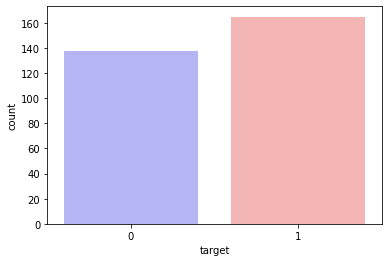

In [9]:
sns.countplot(x = "target", data = heart, palette = "bwr")
plt.show()

In [11]:
countnodise = len(heart[heart.target == 0])
countwithdise = len(heart[heart.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((
countnodise / (len(heart.target))*100)))
print("Percentage of Patients have heart disease: {:.2f}%".format((
countwithdise / (len(heart.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients have heart disease: 54.46%


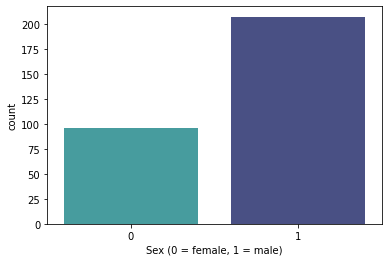

In [12]:
sns.countplot(x='sex', data = heart, palette = "mako_r")
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [13]:
countfemale = len(heart[heart.sex == 0])
countmale = len(heart[heart.sex == 1])
print("Percentage of female patients: {:.2f}".format((countfemale
        / (len(heart.sex))*100)))
print("Percentage of male patients: {:.2f}".format((countmale
        / (len(heart.sex))*100)))

Percentage of female patients: 31.68
Percentage of male patients: 68.32


In [14]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


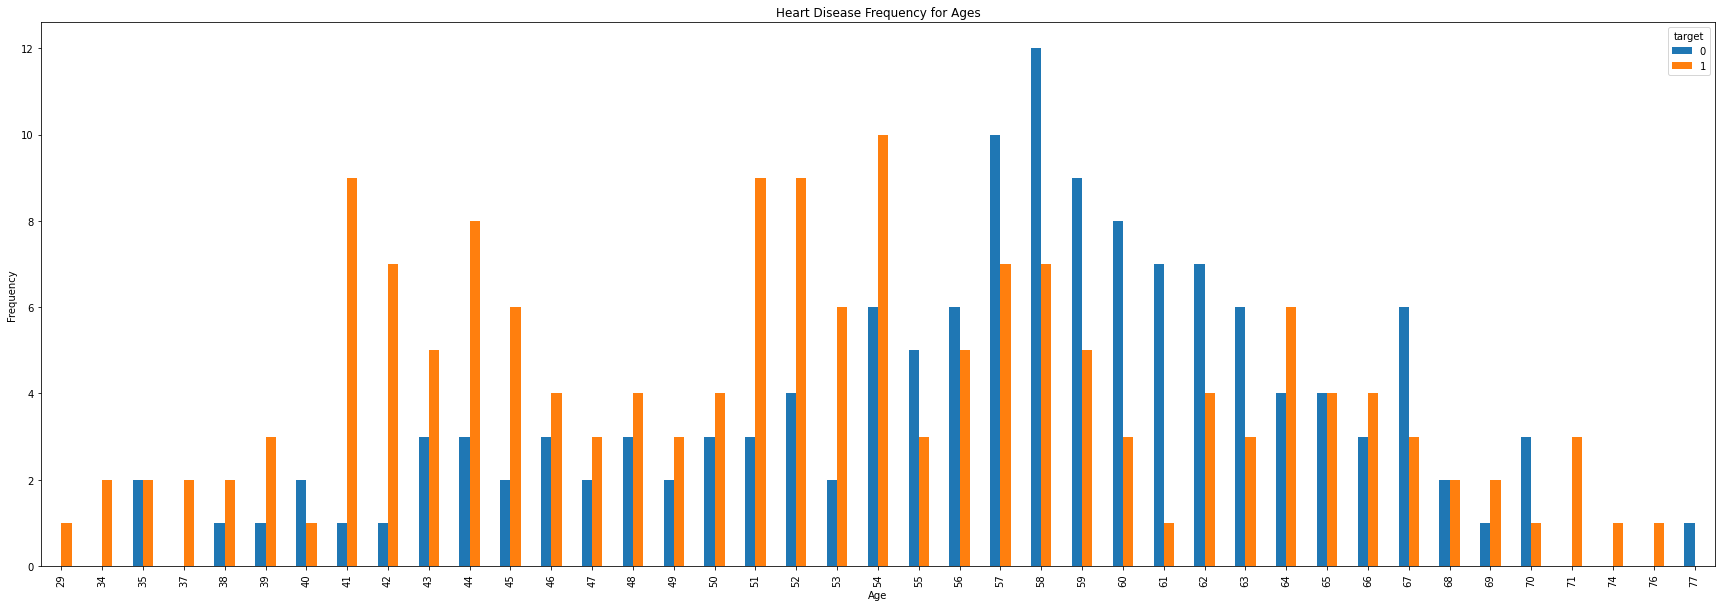

In [16]:
pd.crosstab(heart.age, heart.target).plot(kind = "bar", figsize = 
                                         (30, 10))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heart disease and ages.png')
plt.show()

C:\Users\Delmafia91\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'N' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\Users\Delmafia91\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\Users\Delmafia91\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\Users\Delmafia91\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not s

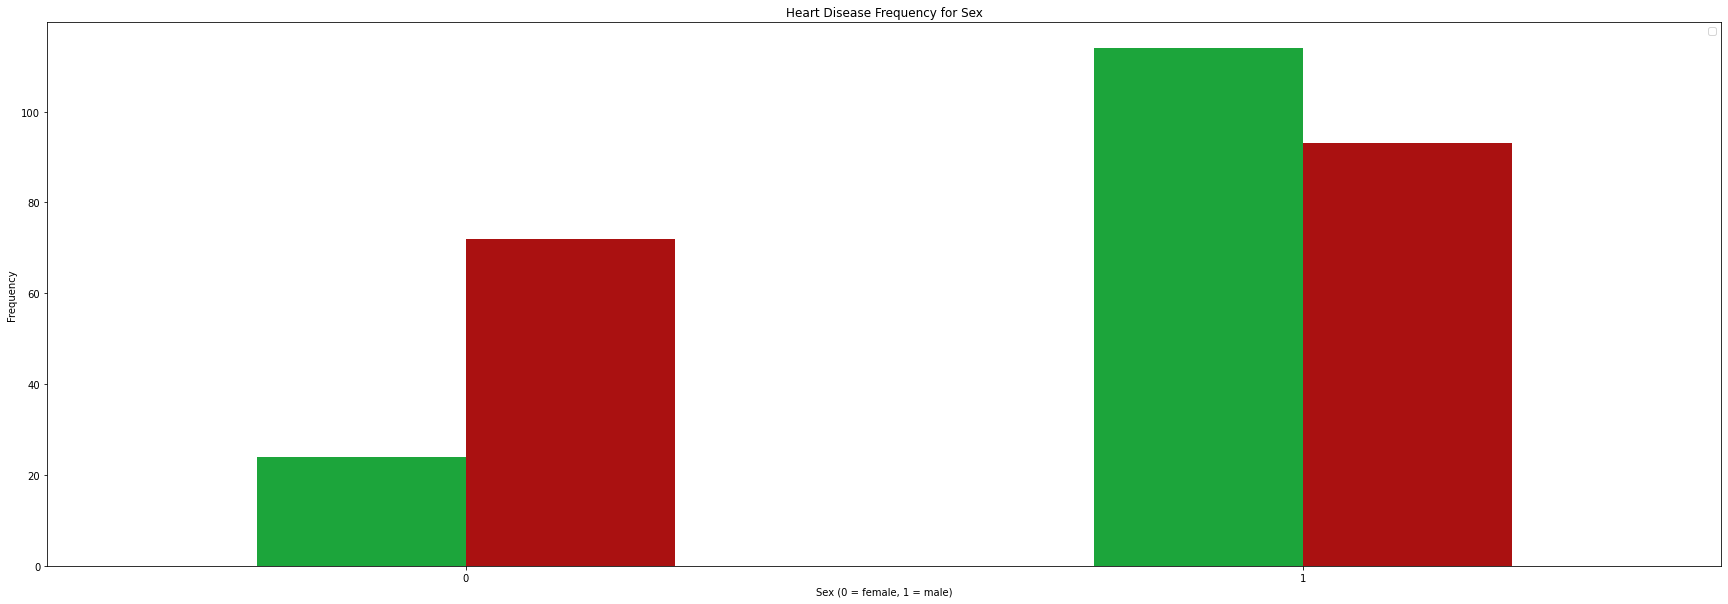

In [18]:
pd.crosstab(heart.sex, heart.target).plot(kind = "bar", figsize = 
                (30, 10), color = ['#1CA53B', '#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.legend("No disease", "Disease")
plt.show()

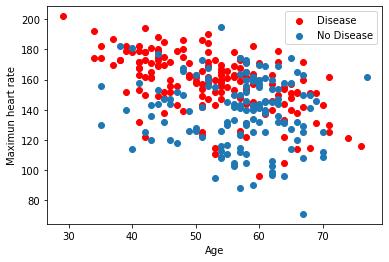

In [23]:
plt.scatter(x=heart.age[heart.target == 1], y=heart.thalach[(heart.target == 1)], c = "red")
plt.scatter(x = heart.age[heart.target == 0], y = heart.thalach[
    (heart.target == 0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximun heart rate")
plt.show()

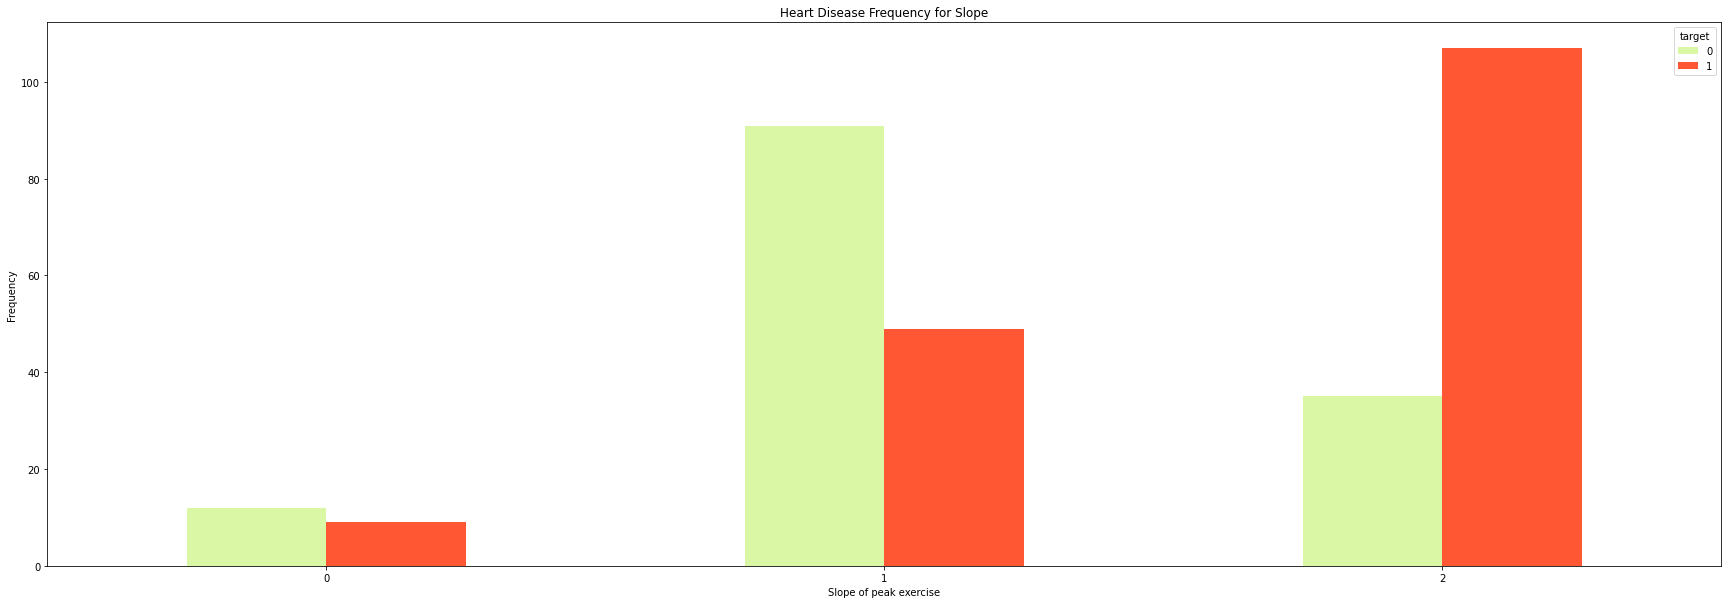

In [24]:
pd.crosstab(heart.slope, heart.target).plot(kind = "bar",
        figsize = (30, 10), color = ['#DAF7A6', '#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('Slope of peak exercise')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()